# Data preparation

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Read from csv file into dataset
housing = pd.read_csv('Advanced Regression.csv')

In [30]:
#sample values of dataset
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
#structure of the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [32]:
#rows and columns of dataset
housing.shape

(1460, 81)

In [33]:
#check if there are duplicate rows
housing.duplicated().sum()

0

In [34]:
housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [35]:
#check all columns's missing value %age
(housing.isnull().sum()*100/len(housing.index)).sort_values(ascending=False) > 70

PoolQC            True
MiscFeature       True
Alley             True
Fence             True
FireplaceQu      False
LotFrontage      False
GarageCond       False
GarageType       False
GarageYrBlt      False
GarageFinish     False
GarageQual       False
BsmtExposure     False
BsmtFinType2     False
BsmtFinType1     False
BsmtCond         False
BsmtQual         False
MasVnrArea       False
MasVnrType       False
Electrical       False
Utilities        False
YearRemodAdd     False
MSSubClass       False
Foundation       False
ExterCond        False
ExterQual        False
Exterior2nd      False
Exterior1st      False
RoofMatl         False
RoofStyle        False
YearBuilt        False
                 ...  
GarageArea       False
PavedDrive       False
WoodDeckSF       False
OpenPorchSF      False
3SsnPorch        False
BsmtUnfSF        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SaleType         False
Functional 

In [36]:
#check columns which have missing values > 70%
columns_to_drop = housing.loc[:,(housing.isnull().sum()*100/len(housing.index)).sort_values(ascending=False) > 70].columns

In [37]:
#check columns
columns_to_drop

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [38]:
#drop these columns which are > 70%
housing = housing.drop(columns_to_drop,axis=1)

In [39]:
#rows and columns of dataset
housing.shape

(1460, 77)

In [40]:
#structure of dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [41]:
#drop the ID column since they are unique
housing = housing.drop('Id',axis=1)

In [42]:
#rows and columns of dataset after dropping
housing.shape

(1460, 76)

In [43]:
#check missing values
housing.isnull().sum() 

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
                ... 
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCars         0
GarageArea         0
GarageQual        81
GarageCond   

In [44]:
#sort the columns in descending order in missing values
(housing.isnull().sum()*100/len(housing.index)).sort_values(ascending=False) 

FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrType        0.547945
MasVnrArea        0.547945
Electrical        0.068493
YearBuilt         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearRemodAdd      0.000000
SalePrice         0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
BldgType          0.000000
Condition2        0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000000
S

In [45]:
#checking all columns which have 1 unique values
# since they have same value - drop them since they will not have any pattern
col= housing.loc[:,housing.apply(pd.Series.nunique) == 1]
housing = housing.loc[:,housing.apply(pd.Series.nunique) != 1]
housing.shape

(1460, 76)

In [46]:
#check the column - it is categorical
housing['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [47]:
#check counts of categorical values
housing['FireplaceQu'].value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [48]:
#check column - it is continuous impute with median
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].median())

In [49]:
#check missing values
(housing.isnull().sum()*100/len(housing.index)).sort_values(ascending=False) 

FireplaceQu      47.260274
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrType        0.547945
MasVnrArea        0.547945
Electrical        0.068493
Exterior2nd       0.000000
YearBuilt         0.000000
Exterior1st       0.000000
RoofMatl          0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
RoofStyle         0.000000
YearRemodAdd      0.000000
SalePrice         0.000000
OverallCond       0.000000
Utilities         0.000000
MSZoning          0.000000
LotFrontage       0.000000
LotArea           0.000000
Street            0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000000
S

In [50]:
#check the columns - all of them are categorical
# imputing the nan value with the mode
housing["FireplaceQu"]=housing["FireplaceQu"].fillna(housing["FireplaceQu"].mode()[0])
housing["GarageType"]=housing["GarageType"].fillna(housing["GarageType"].mode()[0])
housing["GarageFinish"]=housing["GarageFinish"].fillna(housing["GarageFinish"].mode()[0])
housing["GarageQual"]=housing["GarageQual"].fillna(housing["GarageQual"].mode()[0])
housing["GarageCond"]=housing["GarageQual"].fillna(housing["GarageCond"].mode()[0])
housing["BsmtQual"]=housing["BsmtQual"].fillna(housing["BsmtQual"].mode()[0])
housing["MasVnrType"]=housing["MasVnrType"].fillna(housing["MasVnrType"].mode()[0])
housing["MasVnrArea"]=housing["MasVnrArea"].fillna(housing["MasVnrArea"].mode()[0])
housing['BsmtCond'] = housing['BsmtCond'].fillna(housing['BsmtCond'].mode()[0])
housing['BsmtExposure'] = housing['BsmtExposure'].fillna(housing['BsmtExposure'].mode()[0])
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna(housing['BsmtFinType1'].mode()[0])
housing['BsmtFinType2'] = housing['BsmtFinType1'].fillna(housing['BsmtFinType2'].mode()[0])
housing['Electrical'] = housing['Electrical'].fillna(housing['Electrical'].mode()[0])
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].mode()[0])

In [51]:
#check missing values again
(housing.isnull().sum()*100/len(housing.index)).sort_values(ascending=False) 

SalePrice        0.0
Foundation       0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
BsmtQual         0.0
SaleCondition    0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
RoofStyle        0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
                ... 
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
GarageFinish     0.0
GarageType       0.0
CentralAir       0.0
FireplaceQu      0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF     

In [52]:
housing.shape

(1460, 76)

# Univariate Analysis

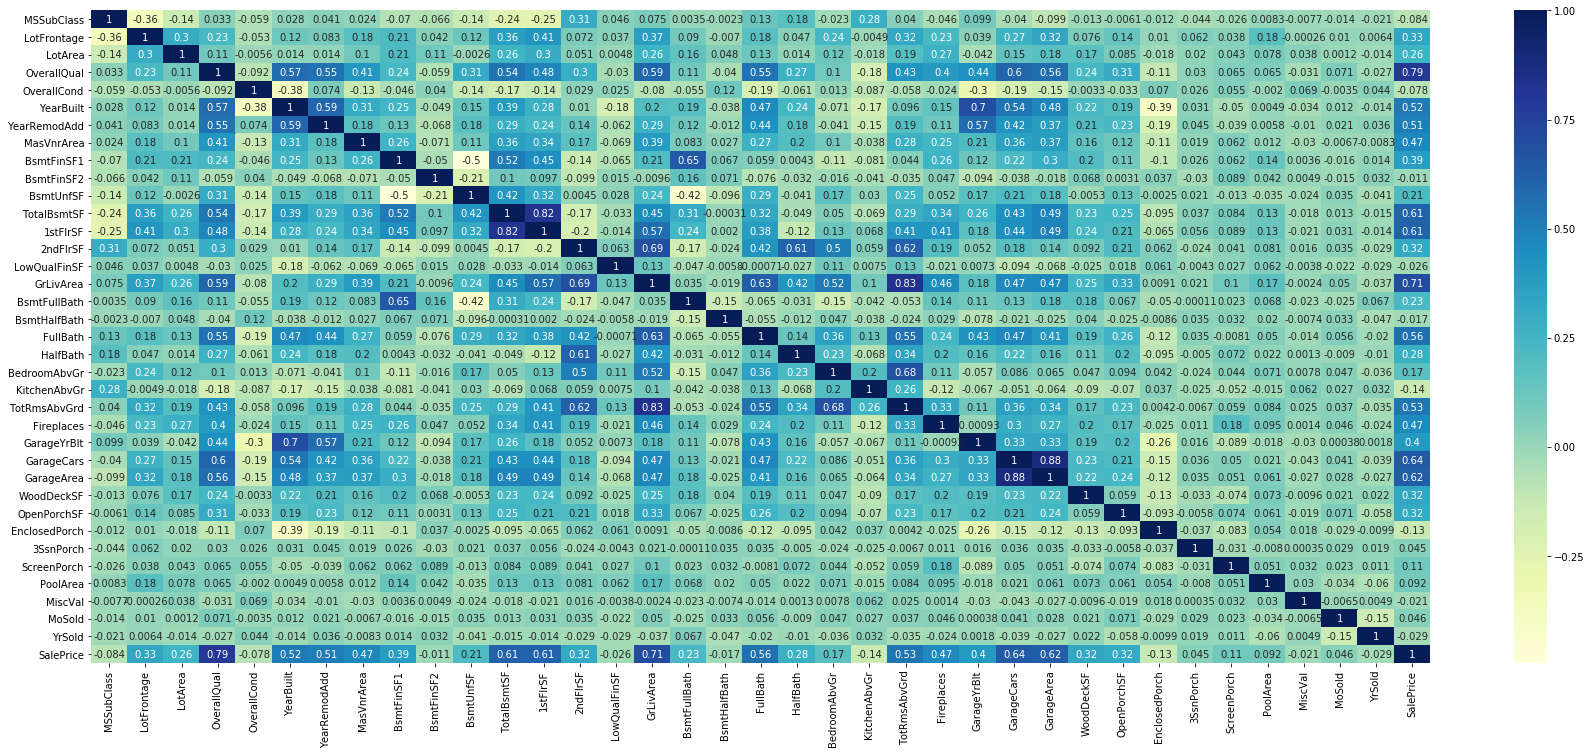

In [53]:
#checking correlation between numerical columns
plt.figure(figsize=(30,12))
sns.heatmap(housing.corr(),cmap='YlGnBu',annot=True)

In [54]:
#select numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
housing_num = housing.select_dtypes(include=numerics)

In [57]:
housing_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [70]:
housing_num.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


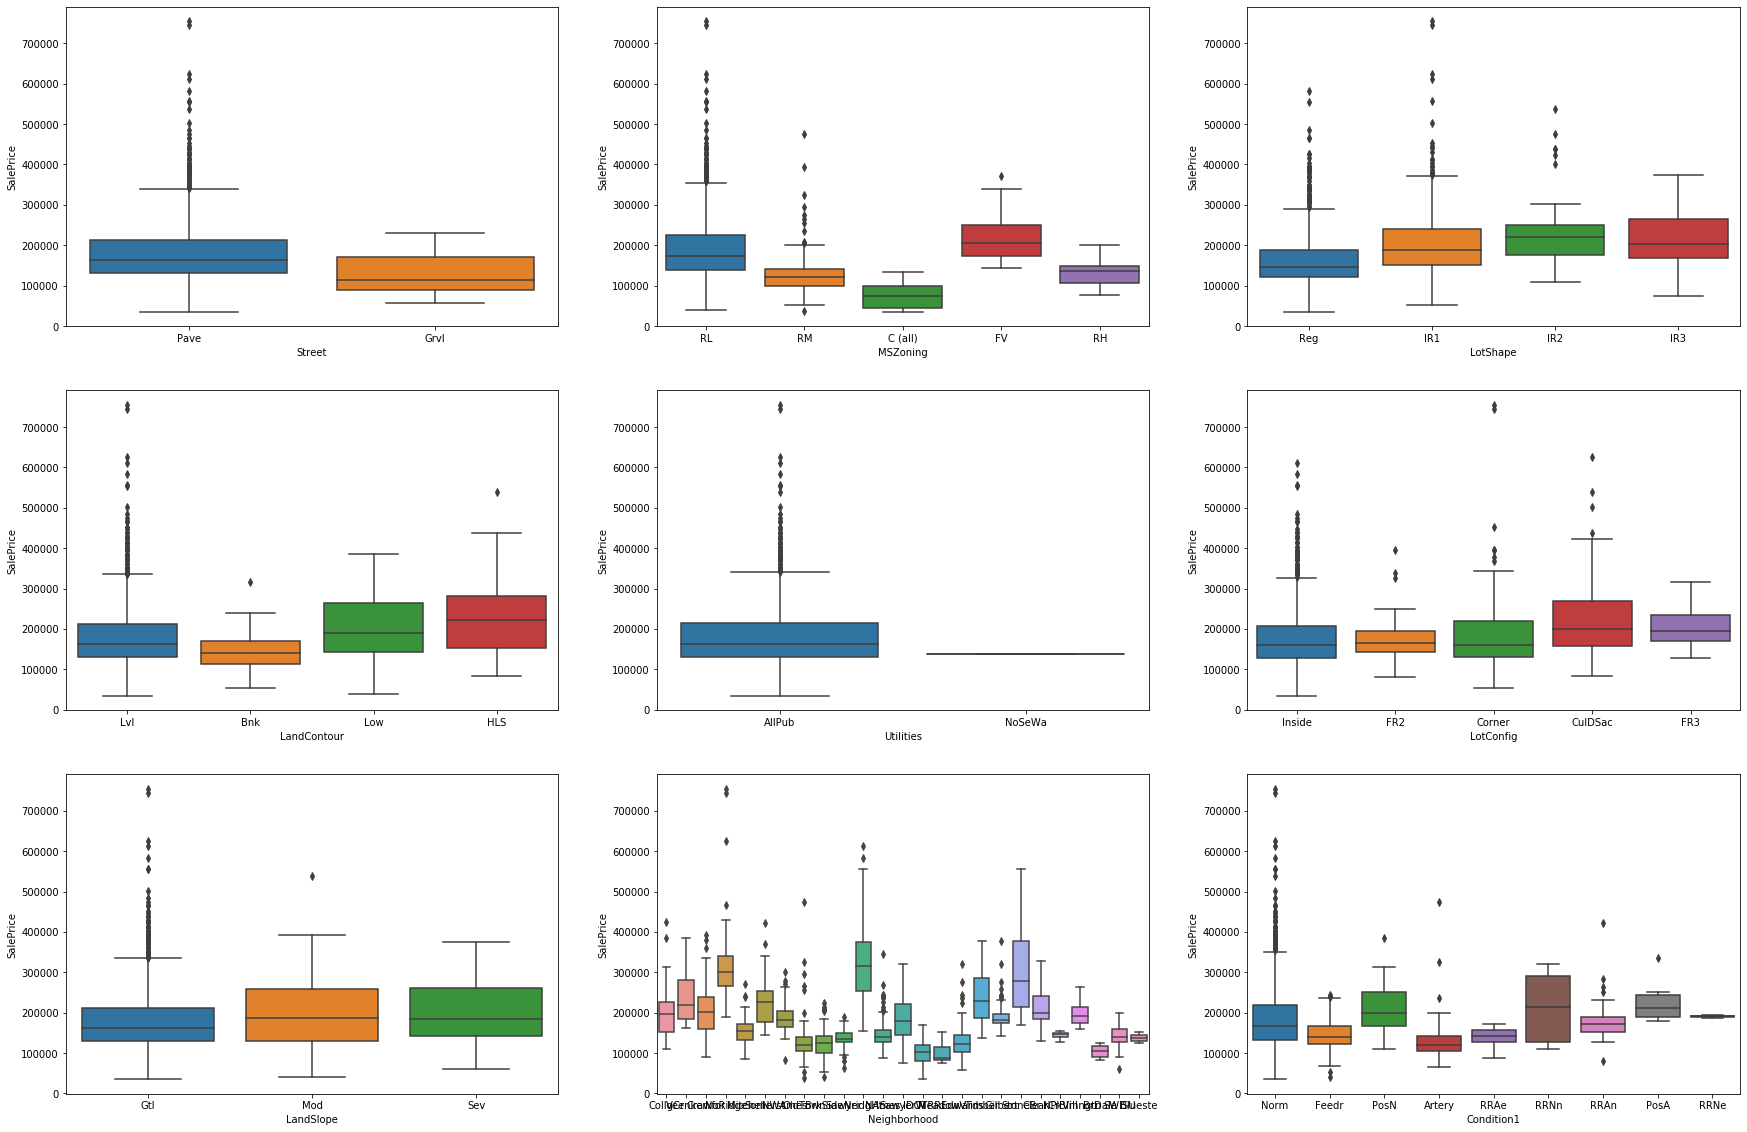

In [72]:
plt.figure(figsize=(30, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'Street', y = 'SalePrice', data = housing)
plt.subplot(3,3,2)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = housing)
plt.subplot(3,3,3)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = housing)
plt.subplot(3,3,4)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = housing)
plt.subplot(3,3,5)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = housing)
plt.subplot(3,3,6)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = housing)
plt.subplot(3,3,7)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = housing)
plt.subplot(3,3,8)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = housing)
plt.subplot(3,3,9)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = housing)
plt.show()

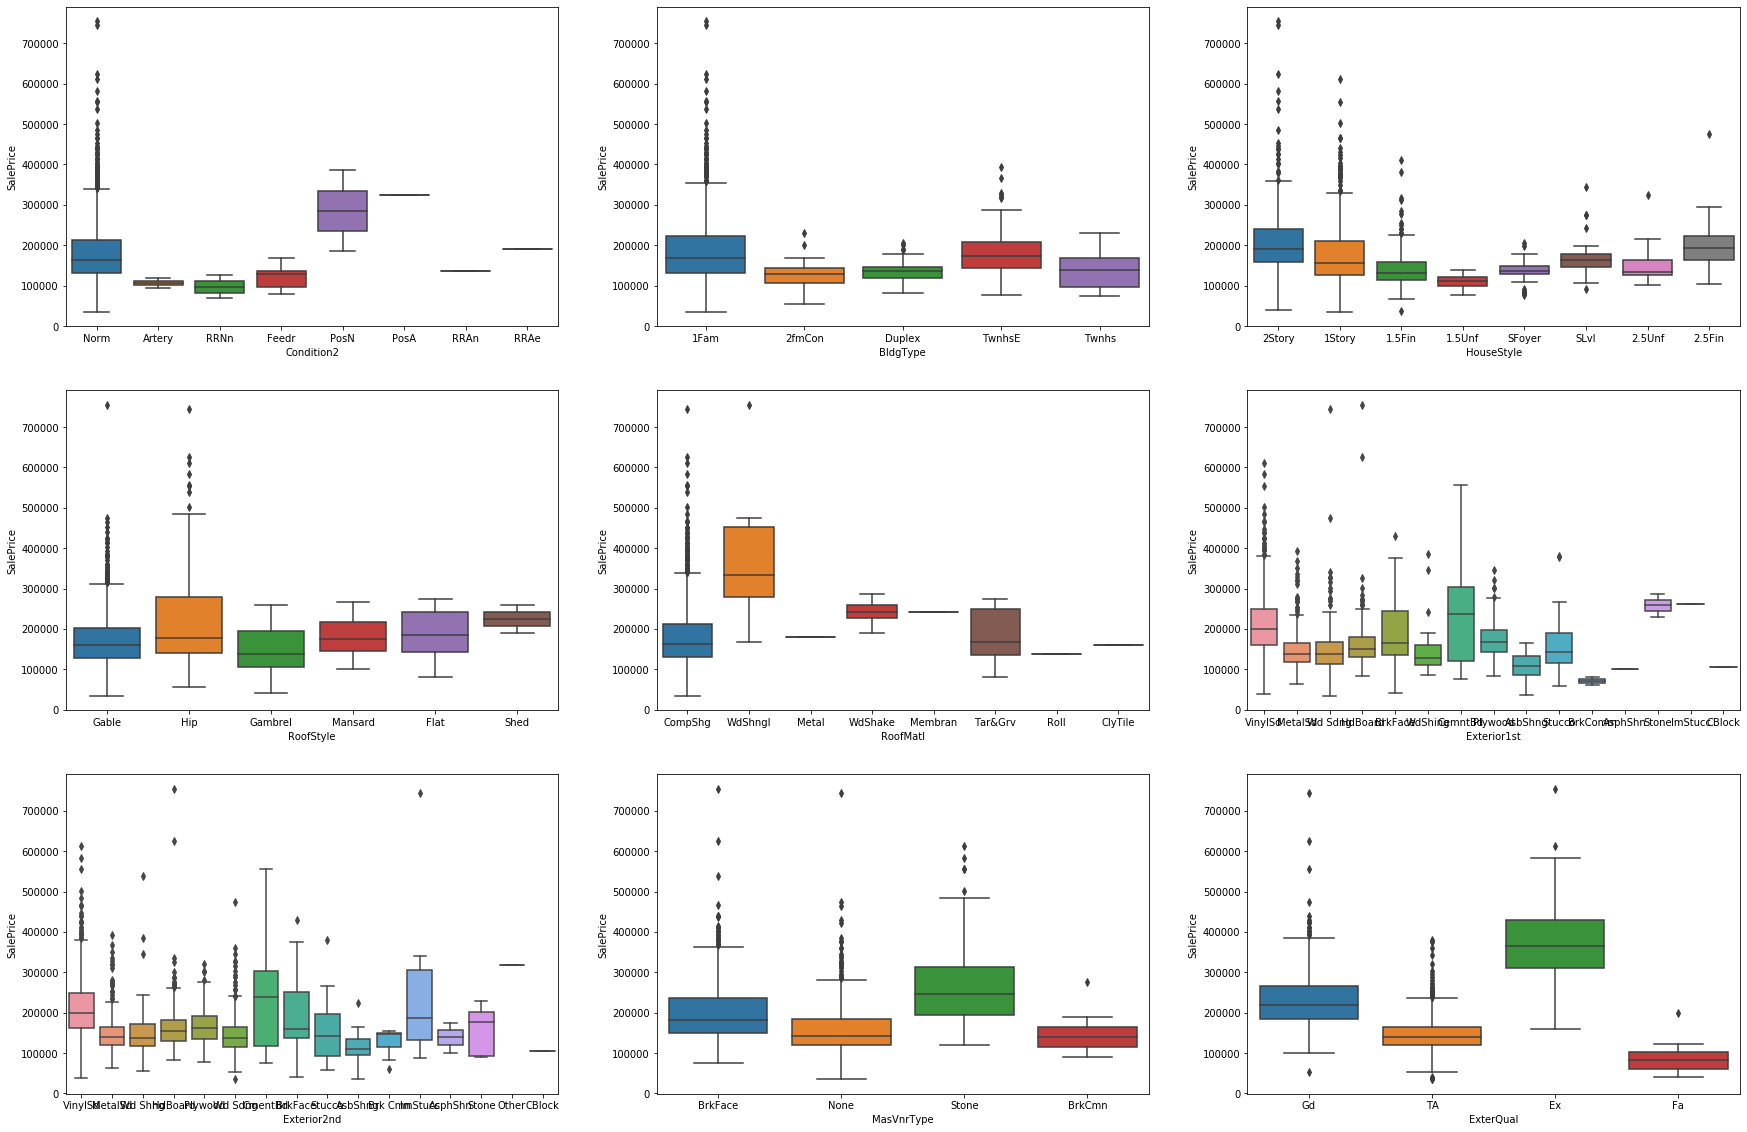

In [74]:
plt.figure(figsize=(30, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = housing)
plt.subplot(3,3,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = housing)
plt.subplot(3,3,3)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = housing)
plt.subplot(3,3,4)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = housing)
plt.subplot(3,3,5)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = housing)
plt.subplot(3,3,6)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = housing)
plt.subplot(3,3,7)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = housing)
plt.subplot(3,3,8)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = housing)
plt.subplot(3,3,9)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = housing)
plt.show()

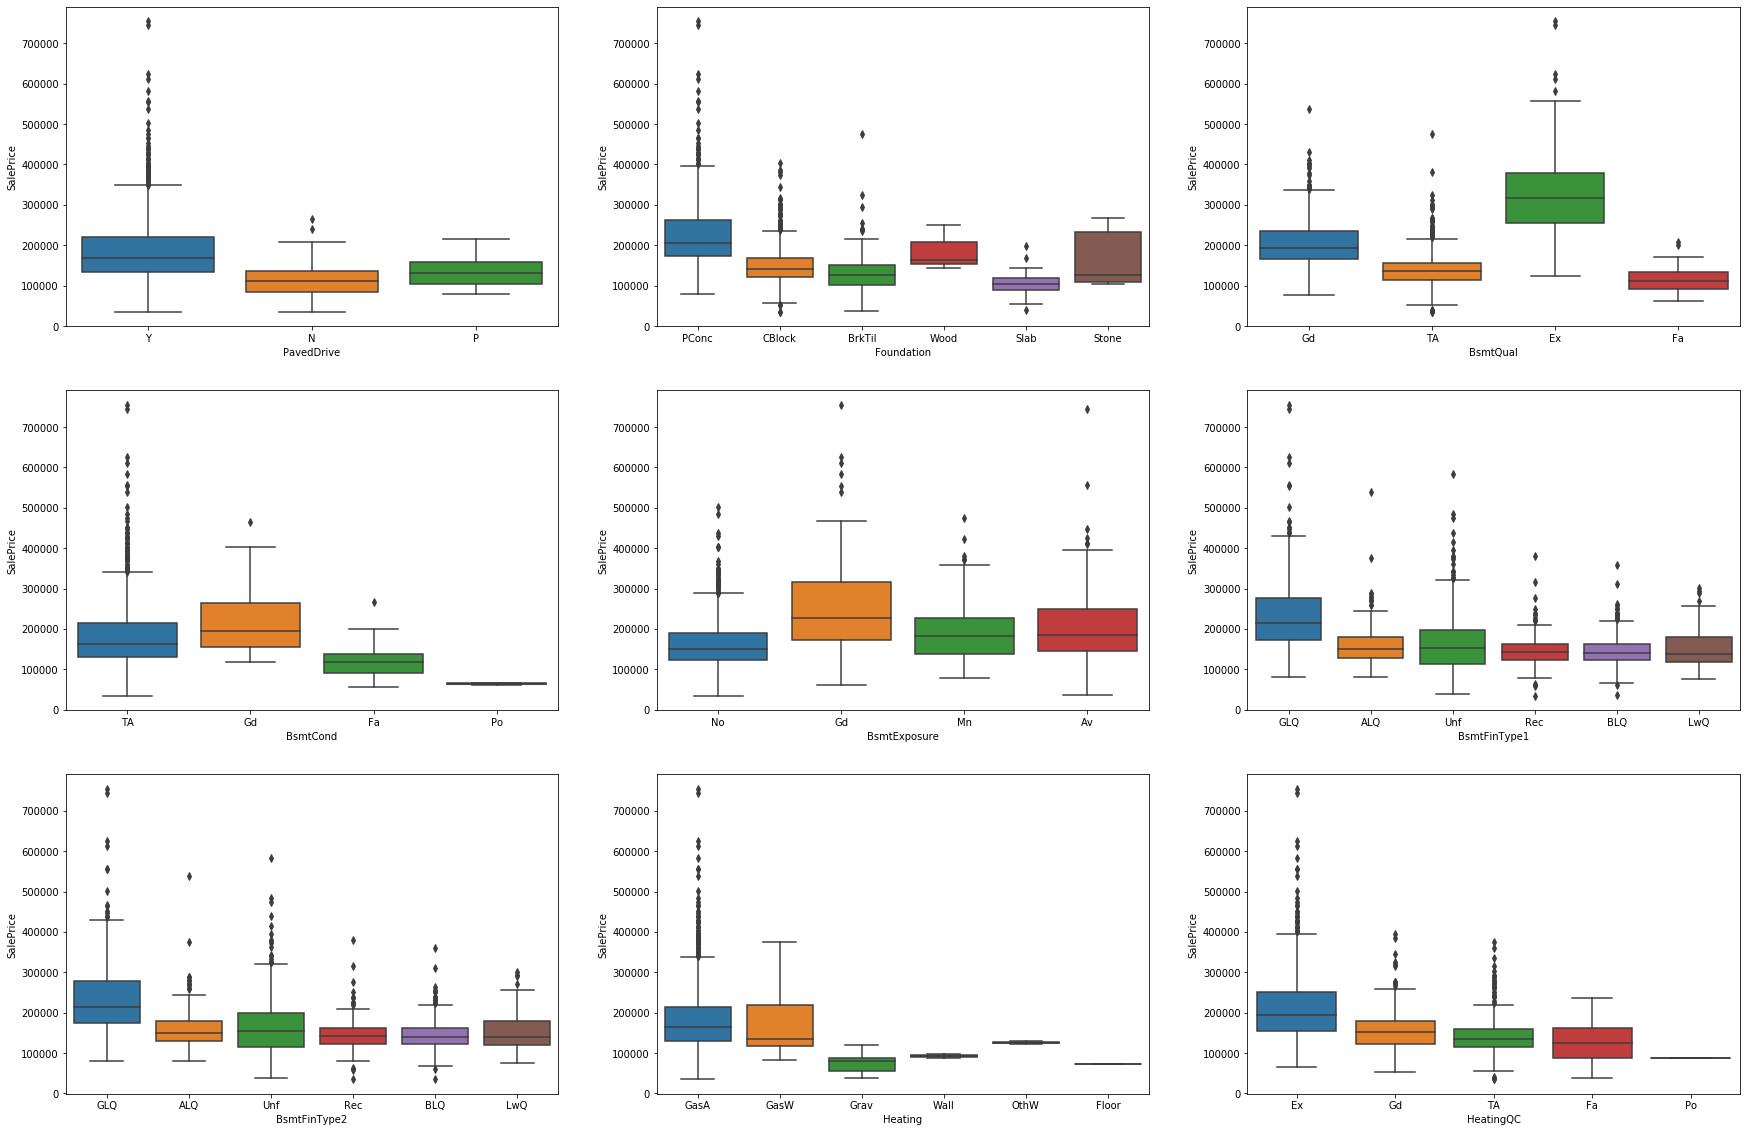

In [75]:
plt.figure(figsize=(30, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = housing)
plt.subplot(3,3,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = housing)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = housing)
plt.subplot(3,3,4)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = housing)
plt.subplot(3,3,5)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = housing)
plt.subplot(3,3,6)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = housing)
plt.subplot(3,3,7)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = housing)
plt.subplot(3,3,8)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = housing)
plt.subplot(3,3,9)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = housing)
plt.show()

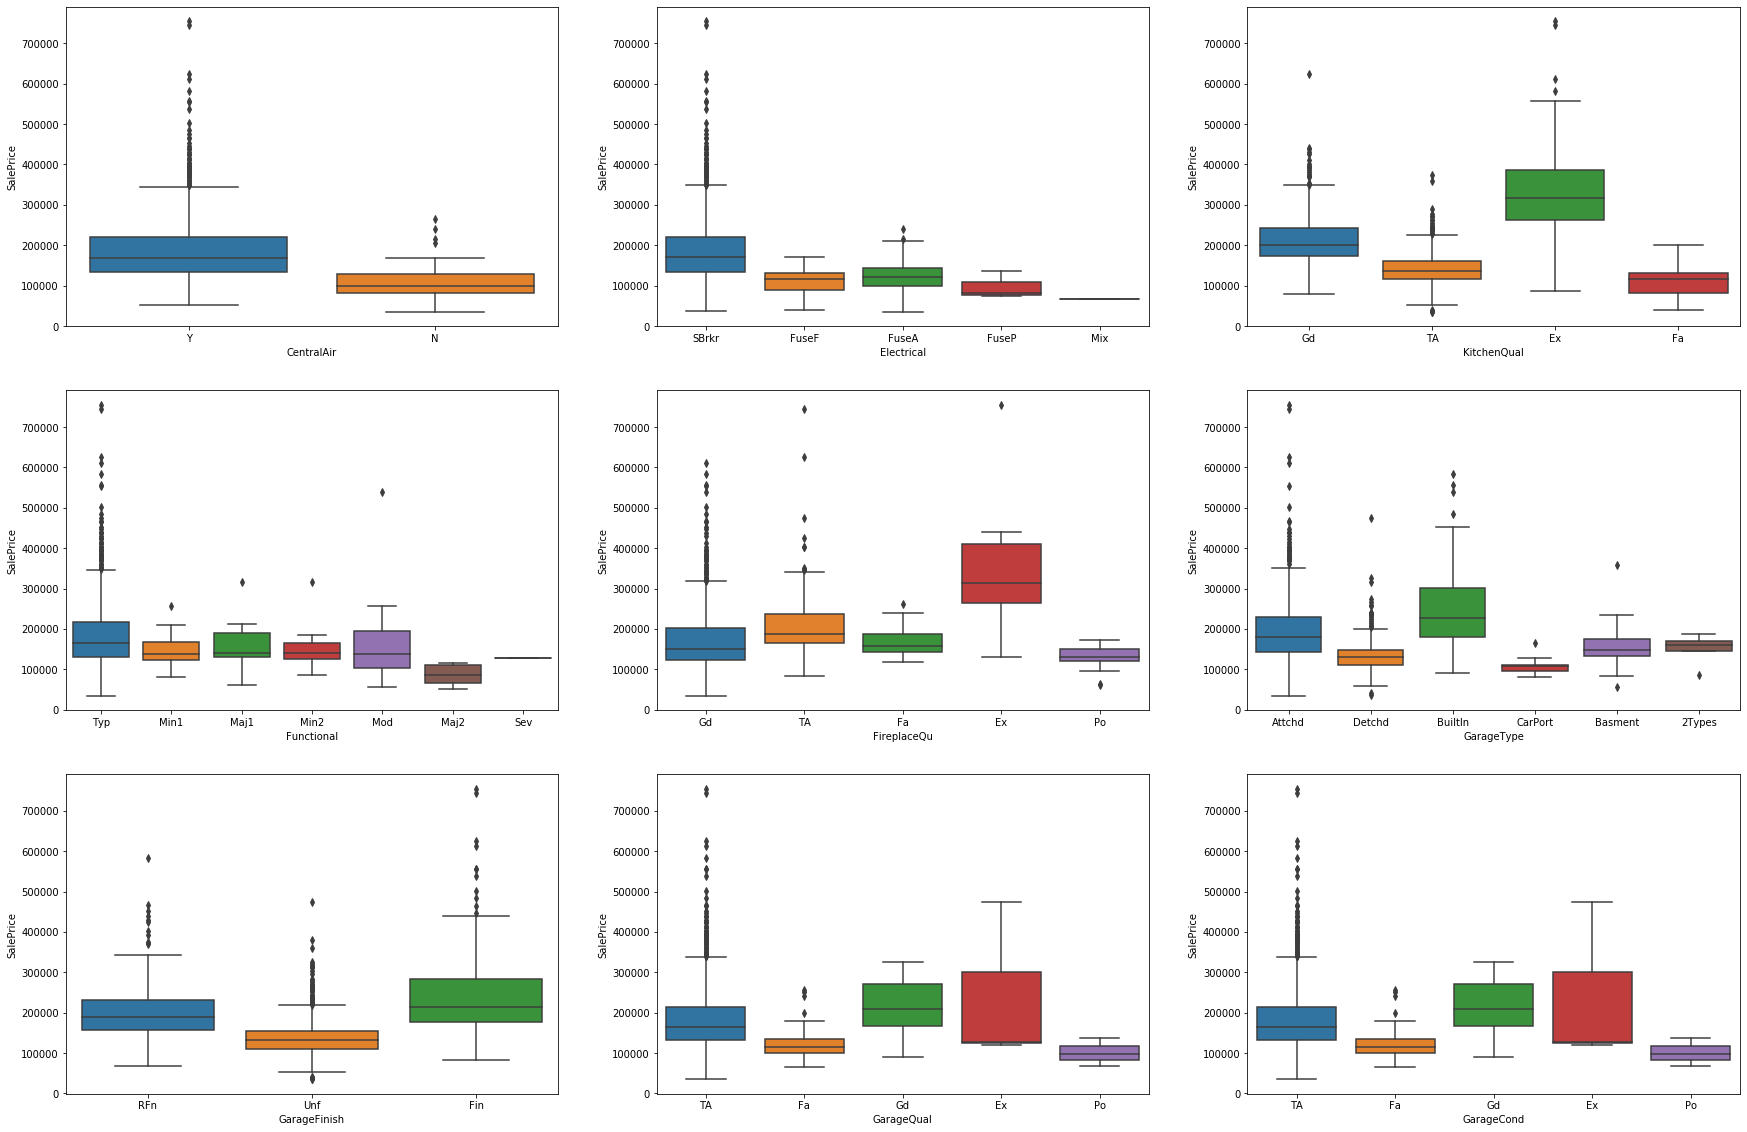

In [76]:
plt.figure(figsize=(30, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = housing)
plt.subplot(3,3,2)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = housing)
plt.subplot(3,3,3)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = housing)
plt.subplot(3,3,4)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = housing)
plt.subplot(3,3,5)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = housing)
plt.subplot(3,3,6)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = housing)
plt.subplot(3,3,7)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = housing)
plt.subplot(3,3,8)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = housing)
plt.subplot(3,3,9)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = housing)
plt.show()